# Explore here

## 1 load the data

In [60]:
# Handle import up-front
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

###1.1 Data loading

In [61]:
# Load the data from the URL provided in the project tutorial
data_df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')

###1.2 Inspect the data

In [62]:
data_df.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [63]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


###1.3. Train-test split

In [64]:
# Separate features from labels
labels=data_df['polarity']
features=data_df.drop('polarity', axis=1)

# Split the data into training and testing features and labels
training_features, testing_features, training_labels, testing_labels=train_test_split(
    features,
    labels,
    test_size=0.25,
    random_state=315
)

###1.4. Data encoding

In [65]:
# Get just the reviews from the training data
training_reviews=training_features['review']

# Fit the vectorizer and transform the training reviews into word counts
vec_model=CountVectorizer(stop_words="english")
training_word_counts=vec_model.fit_transform(training_reviews).toarray()

print(f'Word count matrix has {training_word_counts.shape[0]} rows and {training_word_counts.shape[1]} columns')

Word count matrix has 668 rows and 3151 columns


## 2 EDA

###2.1. Baseline model performance

In [66]:
# Define the model
model=MultinomialNB()

# Cross-validate the model
scores=cross_val_score(model, training_word_counts, training_labels)

###2.2. Missing, and/or extreme values

In [67]:
# Check for missing values
data.isnull().sum()

package_name     0
review           0
polarity         0
review_length    0
dtype: int64

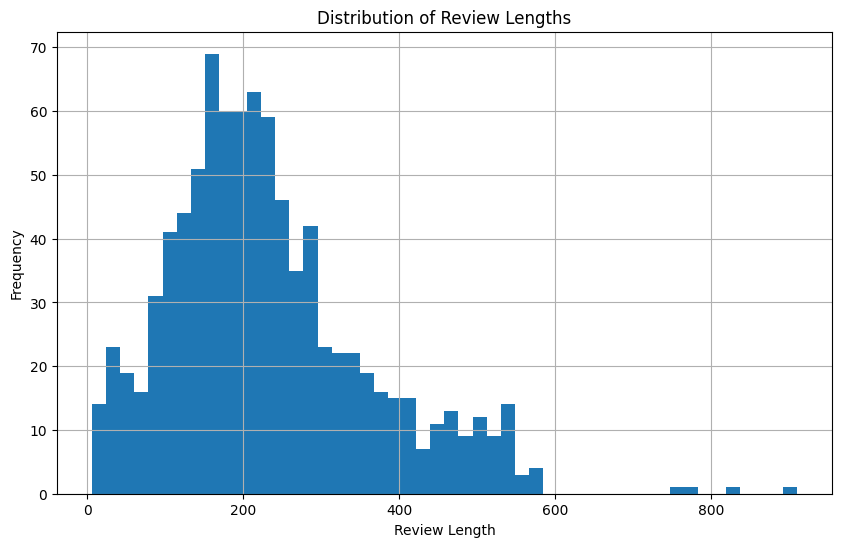

In [68]:
import matplotlib.pyplot as plt

# Add review length to the dataset
data_df['review_length'] = data_df['review'].apply(len)

# Plot distribution of review lengths
plt.figure(figsize=(10,6))
data_df['review_length'].hist(bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

### 2.3. Feature selection

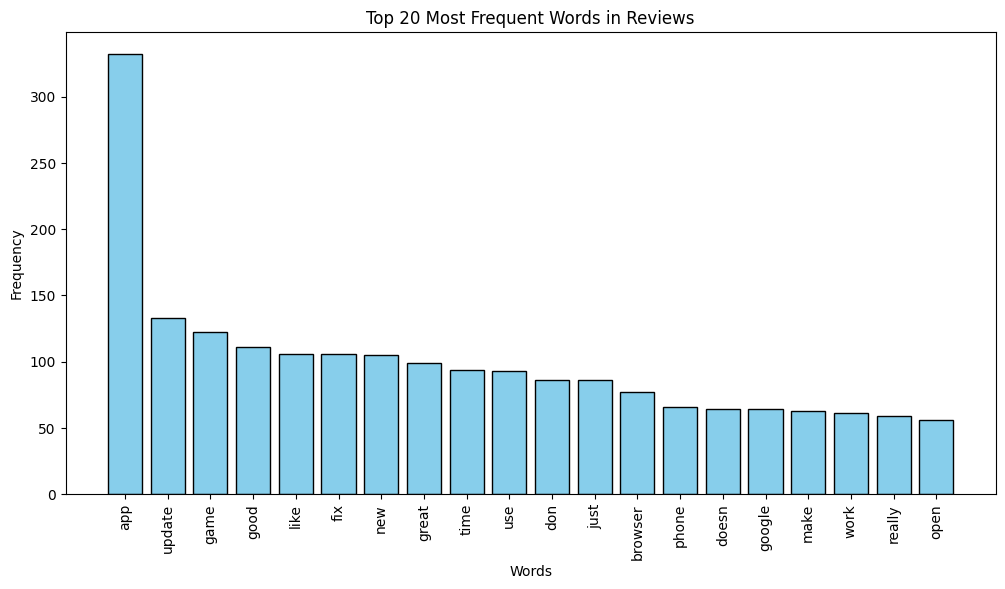

Text(0, 0.5, 'Number of Words')

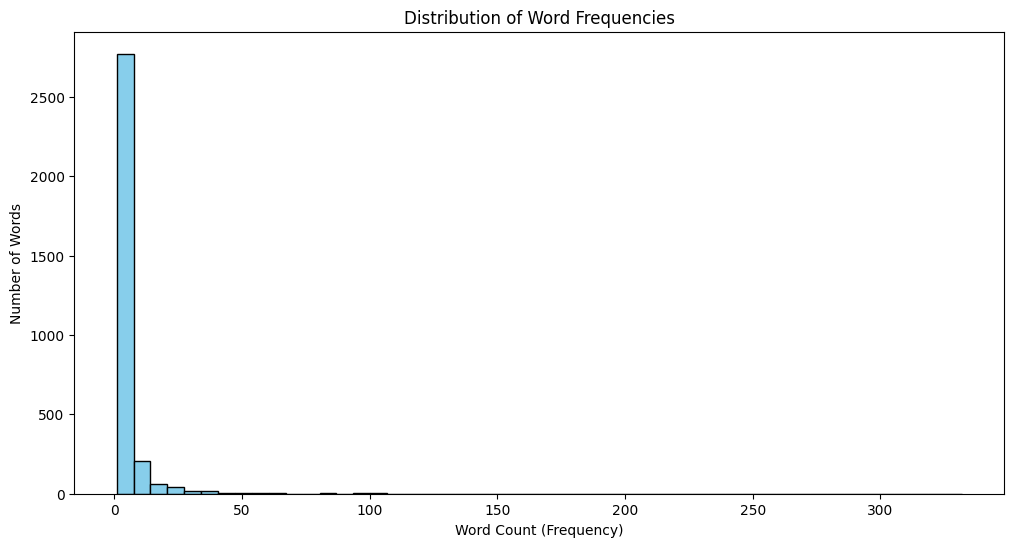

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the sum of word counts across all reviews (sum of counts per word)
# If using a sparse matrix, you can do the following directly:
word_counts = training_word_counts.sum(axis=0).flatten()  # Flatten sparse matrix to 1D array

# Alternatively, if you need to convert to dense and sum:
# word_counts = training_word_counts.toarray().sum(axis=0)

# Get the list of words
words = vec_model.get_feature_names_out()

# Create a DataFrame to visualize word counts and their corresponding words
word_counts_df = pd.DataFrame({'word': words, 'count': word_counts})

# Sort the DataFrame by word count in descending order
word_counts_df = word_counts_df.sort_values(by='count', ascending=False)

# Plot the distribution of word counts (Top 20 words)
plt.figure(figsize=(12, 6))
plt.bar(word_counts_df.head(20)['word'], word_counts_df.head(20)['count'], color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.title('Top 20 Most Frequent Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of word counts (all words, not just top 20)
plt.figure(figsize=(12, 6))
plt.hist(word_counts, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Frequencies')
plt.xlabel('Word Count (Frequency)')
plt.ylabel('Number of Words')

## 3. Model training

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 3: Model Training

# Train the model using Multinomial Naive Bayes
nb_model = MultinomialNB()

# Fit the model to the training data
nb_model.fit(training_word_counts, training_labels)

# Predict on the testing data (transform the test reviews into word counts)
testing_reviews = testing_features['review']
testing_word_counts = vec_model.transform(testing_reviews).toarray()

# Predict the labels for the test set
predictions = nb_model.predict(testing_word_counts)

# Evaluate the model performance

# Accuracy
accuracy = accuracy_score(testing_labels, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(testing_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report (Precision, Recall, F1-score)
class_report = classification_report(testing_labels, predictions)
print("Classification Report:")
print(class_report)

Accuracy: 77.13%
Confusion Matrix:
[[124  18]
 [ 33  48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       142
           1       0.73      0.59      0.65        81

    accuracy                           0.77       223
   macro avg       0.76      0.73      0.74       223
weighted avg       0.77      0.77      0.77       223



## Sep 4: Model Optimization

In [74]:
# 1. Data encoding - Convert reviews to a bag-of-words format
training_reviews = training_features['review']
testing_reviews = testing_features['review']

# Vectorize the reviews using CountVectorizer (sparse matrix)
vec_model = CountVectorizer(stop_words="english")
training_word_counts = vec_model.fit_transform(training_reviews)
testing_word_counts = vec_model.transform(testing_reviews)

# Convert sparse matrix to dense format for Naive Bayes models
training_word_counts_dense = training_word_counts.toarray()  # Converting to dense array
testing_word_counts_dense = testing_word_counts.toarray()  # Converting to dense array

# 2. Model training and evaluation

# 3.1 Gaussian Naive Bayes - works on dense data
gnb_model = GaussianNB()
gnb_model.fit(training_word_counts_dense, training_labels)
gnb_predictions = gnb_model.predict(testing_word_counts_dense)
gnb_accuracy = accuracy_score(testing_labels, gnb_predictions)
print(f"Gaussian Naive Bayes Accuracy: {gnb_accuracy * 100:.2f}%")
print(classification_report(testing_labels, gnb_predictions))

# 2.2 Multinomial Naive Bayes - works on dense data
mnb_model = MultinomialNB()
mnb_model.fit(training_word_counts_dense, training_labels)
mnb_predictions = mnb_model.predict(testing_word_counts_dense)
mnb_accuracy = accuracy_score(testing_labels, mnb_predictions)
print(f"\nMultinomial Naive Bayes Accuracy: {mnb_accuracy * 100:.2f}%")
print(classification_report(testing_labels, mnb_predictions))

# 2.3 Bernoulli Naive Bayes - works on binary features (0 or 1)
bnb_model = BernoulliNB()

# Convert word counts to binary features (1 if word appears, 0 otherwise)
training_word_counts_binary = (training_word_counts > 0).astype(int)
testing_word_counts_binary = (testing_word_counts > 0).astype(int)

bnb_model.fit(training_word_counts_binary, training_labels)
bnb_predictions = bnb_model.predict(testing_word_counts_binary)
bnb_accuracy = accuracy_score(testing_labels, bnb_predictions)
print(f"\nBernoulli Naive Bayes Accuracy: {bnb_accuracy * 100:.2f}%")
print(classification_report(testing_labels, bnb_predictions))

# 2.4 Multinomial Naive Bayes using TF-IDF features (alternative vectorizer)
print("\nTraining with Multinomial Naive Bayes using TF-IDF features...")
tfidf_vectorizer = TfidfVectorizer(stop_words="english")

# Convert to dense array using TF-IDF
training_tfidf = tfidf_vectorizer.fit_transform(training_reviews).toarray()  # Sparse to dense
testing_tfidf = tfidf_vectorizer.transform(testing_reviews).toarray()  # Sparse to dense

mnb_tfidf_model = MultinomialNB()
mnb_tfidf_model.fit(training_tfidf, training_labels)
mnb_tfidf_predictions = mnb_tfidf_model.predict(testing_tfidf)
mnb_tfidf_accuracy = accuracy_score(testing_labels, mnb_tfidf_predictions)
print(f"Multinomial Naive Bayes (TF-IDF) Accuracy: {mnb_tfidf_accuracy * 100:.2f}%")
print(classification_report(testing_labels, mnb_tfidf_predictions))

Gaussian Naive Bayes Accuracy: 75.34%
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       142
           1       0.70      0.56      0.62        81

    accuracy                           0.75       223
   macro avg       0.74      0.71      0.72       223
weighted avg       0.75      0.75      0.75       223


Multinomial Naive Bayes Accuracy: 77.13%
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       142
           1       0.73      0.59      0.65        81

    accuracy                           0.77       223
   macro avg       0.76      0.73      0.74       223
weighted avg       0.77      0.77      0.77       223


Bernoulli Naive Bayes Accuracy: 72.65%
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       142
           1       0.75      0.37      0.50        81

    accuracy                           0.73       223
   macro

## 5. Final model evaluation

Accuracy: 0.7713
Precision: 0.7273
Recall: 0.5926
F1-Score: 0.6531


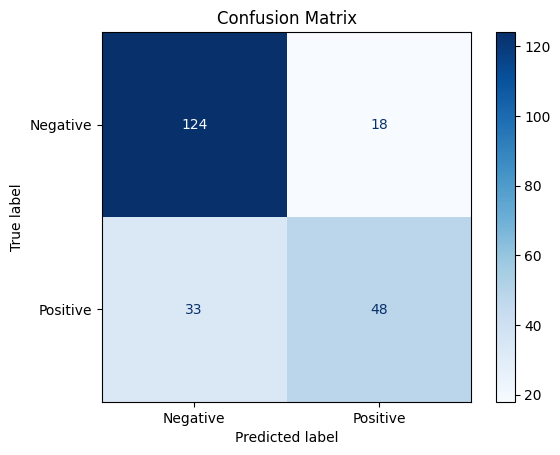

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Fit the model on the training data
model = MultinomialNB()  # Initialize the model
model.fit(training_word_counts, training_labels)  # Train the model on the training data

# Step 2: Make Predictions on the Test Set
# Transform the test reviews into word counts using the fitted vectorizer
testing_word_counts = vec_model.transform(testing_reviews).toarray()

# Predict labels using the trained model
predictions = model.predict(testing_word_counts)

# Step 3: Evaluate the Model Using Metrics
accuracy = accuracy_score(testing_labels, predictions)
precision = precision_score(testing_labels, predictions)
recall = recall_score(testing_labels, predictions)
f1 = f1_score(testing_labels, predictions)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Step 4: Confusion Matrix
conf_matrix = confusion_matrix(testing_labels, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()